In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')

Land is in square miles

In [7]:
dfl = pd.read_csv('../files/land.csv')

dfup = pd.read_csv('../files/usafacts_pop.csv')
dfuc = pd.read_csv('../files/usafacts_cases2.csv')

dfup.rename(columns={'countyFIPS':'fips'}, inplace=True)


dfuc.rename(columns={'countyFIPS':'fips'}, inplace=True)

# dfuc = dfuc.iloc[:,[0,86]]

unique = dfuc.fips.unique()

dfup = dfup.loc[dfup.fips.isin(unique)]

dfl = dfl.loc[dfl.fips.isin(unique)]
dfl = dfl.rename(columns={'LND110210':'land', 'POP060210': 'pop'})

dfuc = dfuc.loc[dfuc.fips != 0]
dfup = dfup.loc[dfup.fips != 0]

dfuc = dfuc.sort_values(by='fips')
dfup = dfup.sort_values(by='fips')
dfuc = dfuc.reset_index(drop=True)
dfup = dfup.reset_index(drop=True)

dfuc = dfuc.drop([0], axis=0)
dfuc = dfuc.reset_index(drop=True)

dfuc = dfuc.drop(columns=['stateFIPS'])

dfu = pd.concat([dfup, dfuc.drop(columns=['fips', 'State', 'County Name'])], axis=1)

dfl = dfl.drop([0], axis=0)
dfl = dfl.reset_index(drop=True)

unique2 = dfl.fips.unique()

dfu = dfu.loc[dfu.fips.isin(unique2)]

dfu = dfu.reset_index(drop=True)

df = pd.concat([dfl, dfu.drop(columns='fips')], axis=1)

df = df.rename(columns={'State':'St'})

df = df.drop(columns='pop')  # drop the 2010 census population density

df['density'] = df.population / df.land

In [8]:
def specialize(row):
    if row.St == 'NY':
        return 'New York'
    elif row.St == 'CA':
        return 'California'
    elif row.St == 'NJ':
        return 'New Jersey'
    elif row.St == 'LA':
        return 'Louisiana'
    elif row.St == 'WA':
        return 'Washington'
    else:
        return 'Other States'

def coast(row):
    if row.St in ['NY', 'NJ', 'CT', 'RI', 'MA', 'PA']:
        return 'East'
    elif row.St in ['CA', 'OR', 'WA']:
        return 'West'
    else:
        return 'Other'
    
    
df['Counties in\nSpecific States'] = df.apply(specialize, axis='columns')
df['Coast'] = df.apply(coast, axis='columns')

colors = sns.color_palette()[1:5] + list(sns.color_palette()[7:8])
colors.reverse()

df = df.rename(columns={'population':'Population'})

In [9]:
print(round(19+3.5+8.9+1+6.9+12.8, 1), 'east population')
print(round(39+7.6+4.2, 1), 'west population')

52.1 east population
50.8 west population


In [10]:
last = df.shape[1] - 3

In [11]:
for i in range(5, last):
    date = df.columns[i]
    casespc_col = df.columns[i] + '_casespc'
    df[casespc_col] = (df.iloc[:,i] / df.Population) * 100_000

In [12]:
plt.style.use('default')

In [15]:
for i in range(40, last):  # min is 5
    plt.figure(figsize=(7.4, 4.8))
    date = df.columns[i]
    casespc_col = df.columns[i] + '_casespc'
#     df[casespc_col] = (df.iloc[:,i] / df.population) * 100_000

    sns.scatterplot(x='density', y=casespc_col, hue='Coast', 
#                     palette=sns.color_palette()[:2], 
                    size='Population',
                    size_norm=(0, 1_500_000),
                    data=df.loc[(df['Coast'] == 'East') | 
                                (df['Coast'] == 'West')] , 
                                hue_order=['East', 'West'], 
                                alpha=0.5)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xscale("log")
    plt.yscale("log")
    plt.ylabel('Cases Per 100,000 People')
    plt.xlabel('Population Density ($pop / mile^2$)')
    plt.ylim(0.1, 10_000)
    plt.xlim(0.1, 300_000)
    plt.title('Confirmed COVID-19 cases in US Counties on {} ($log \,\, scale$)'.format(date))
    txt = '\n\nEast coast is NY, NJ, CT, RI, MA, and PA. West coast is CA, OR, and WA.'
    plt.figtext(0.5, 0.01, txt, wrap=False, horizontalalignment='right', fontsize=7)
    plt.grid(alpha=0.4)
    plt.tight_layout()
    plt.savefig('../files/gif_coast_size/casespc_{}.png'.format(i), dpi=300)
    plt.show()

In [281]:
df.loc

fips      land        County Name  St  population  1/22/20  1/23/20  \
0      1001    594.44     Autauga County  AL       55869        0        0   
1      1003   1589.78     Baldwin County  AL      223234        0        0   
2      1005    884.88     Barbour County  AL       24686        0        0   
3      1007    622.58        Bibb County  AL       22394        0        0   
4      1009    644.78      Blount County  AL       57826        0        0   
...     ...       ...                ...  ..         ...      ...      ...   
3137  56037  10426.65  Sweetwater County  WY       42343        0        0   
3138  56039   3995.38       Teton County  WY       23464        0        0   
3139  56041   2081.26       Uinta County  WY       20226        0        0   
3140  56043   2238.55    Washakie County  WY        7805        0        0   
3141  56045   2398.09      Weston County  WY        6927        0        0   

      1/24/20  1/25/20  1/26/20  ...  1/27/20_casespc  1/28/20_casespc  \
0           0        0        0  ...              0.0              0.0   
1           0        0        0  ...              0.0              0.0   
2           0        0        0  ...              0.0              0.0   
3           0        0        0  ...              0.0              0.0   
4           0        0        0  ...              0.0              0.0   
...       ...      ...      ...  ...              ...              ...   
3137        0        0        0  ...              0.0              0.0   
3138        0        0        0  ...              0.0              0.0   
3139        0        0        0  ...              0.0              0.0   
3140        0        0        0  ...              0.0              0.0   
3141        0        0        0  ...              0.0              0.0   

      1/29/20_casespc  1/30/20_casespc  1/31/20_casespc  2/1/20_casespc  \
0                 0.0              0.0              0.0             0.0   
1                 0.0              0.0              0.0             0.0   
2                 0.0              0.0              0.0             0.0   
3                 0.0              0.0              0.0             0.0   
4                 0.0              0.0              0.0             0.0   
...               ...              ...              ...             ...   
3137              0.0              0.0              0.0             0.0   
3138              0.0              0.0              0.0             0.0   
3139              0.0              0.0              0.0             0.0   
3140              0.0              0.0              0.0             0.0   
3141              0.0              0.0              0.0             0.0   

      2/2/20_casespc  2/3/20_casespc  2/4/20_casespc  2/5/20_casespc  
0                0.0             0.0             0.0             0.0  
1                0.0             0.0             0.0             0.0  
2                0.0             0.0             0.0             0.0  
3                0.0             0.0             0.0             0.0  
4                0.0             0.0             0.0             0.0  
...              ...             ...             ...             ...  
3137             0.0             0.0             0.0             0.0  
3138             0.0             0.0             0.0             0.0  
3139             0.0             0.0             0.0             0.0  
3140             0.0             0.0             0.0             0.0  
3141             0.0             0.0             0.0             0.0  

[3142 rows x 174 columns]

In [18]:
# df['State'] df.rename(columns={'St':'State'})

In [10]:
df

fips      land        County Name  St  Population  1/22/20  1/23/20  \
0      1001    594.44     Autauga County  AL       55869        0        0   
1      1003   1589.78     Baldwin County  AL      223234        0        0   
2      1005    884.88     Barbour County  AL       24686        0        0   
3      1007    622.58        Bibb County  AL       22394        0        0   
4      1009    644.78      Blount County  AL       57826        0        0   
...     ...       ...                ...  ..         ...      ...      ...   
3137  56037  10426.65  Sweetwater County  WY       42343        0        0   
3138  56039   3995.38       Teton County  WY       23464        0        0   
3139  56041   2081.26       Uinta County  WY       20226        0        0   
3140  56043   2238.55    Washakie County  WY        7805        0        0   
3141  56045   2398.09      Weston County  WY        6927        0        0   

      1/24/20  1/25/20  1/26/20  ...  4/4/20_casespc  4/5/20_casespc  \
0           0        0        0  ...       21.478817       21.478817   
1           0        0        0  ...       12.990853       15.230655   
2           0        0        0  ...        8.101758        8.101758   
3           0        0        0  ...       17.861927       31.258373   
4           0        0        0  ...       17.293259       17.293259   
...       ...      ...      ...  ...             ...             ...   
3137        0        0        0  ...        9.446662       11.808327   
3138        0        0        0  ...      153.426526      166.212070   
3139        0        0        0  ...        9.888263        9.888263   
3140        0        0        0  ...       25.624600       51.249199   
3141        0        0        0  ...        0.000000        0.000000   

      4/6/20_casespc  4/7/20_casespc  4/8/20_casespc  4/9/20_casespc  \
0          21.478817       21.478817       21.478817       30.428323   
1          17.022497       18.814338       21.950061       26.429666   
2          12.152637       12.152637       12.152637       28.356153   
3          31.258373       35.723855       40.189336       49.120300   
4          17.293259       17.293259       17.293259       19.022585   
...              ...             ...             ...             ...   
3137       11.808327       14.169993       14.169993       14.169993   
3138      170.473917      187.521309      191.783157      213.092397   
3139       14.832394       14.832394       14.832394       19.776525   
3140       51.249199       64.061499       64.061499       64.061499   
3141        0.000000        0.000000        0.000000        0.000000   

      4/10/20_casespc  4/11/20_casespc  4/12/20_casespc  4/13/20_casespc  
0           30.428323        34.008126        34.008126        34.008126  
1           26.429666        29.565389        31.805191        34.940914  
2           36.457911        40.508790        40.508790        36.457911  
3           49.120300        58.051264        71.447709        75.913191  
4           20.751911        20.751911        22.481237        25.939889  
...               ...              ...              ...              ...  
3137        16.531658        16.531658        16.531658        21.254989  
3138       225.877941       225.877941       238.663484       238.663484  
3139        19.776525        19.776525        19.776525        19.776525  
3140        64.061499        64.061499        64.061499        64.061499  
3141         0.000000         0.000000         0.000000         0.000000  

[3142 rows x 174 columns]

In [56]:
states_dic = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [57]:
def states_func(row):
    return states_dic[row.St]

In [59]:
df['State'] = df.apply(states_func, axis='columns')

In [60]:
state_list = df.State.unique()

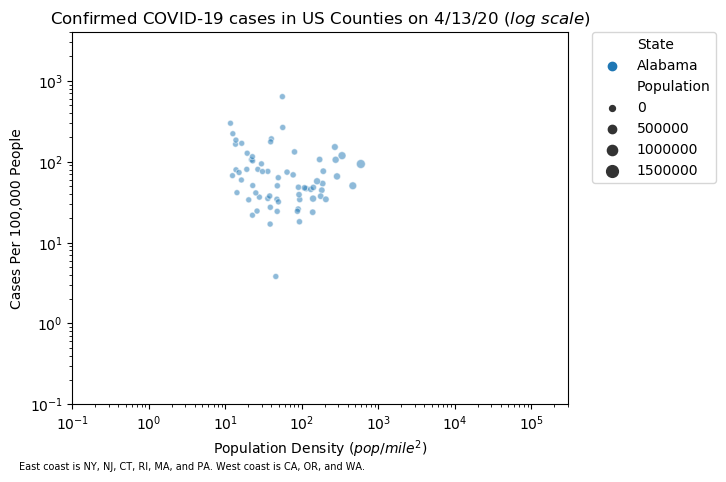

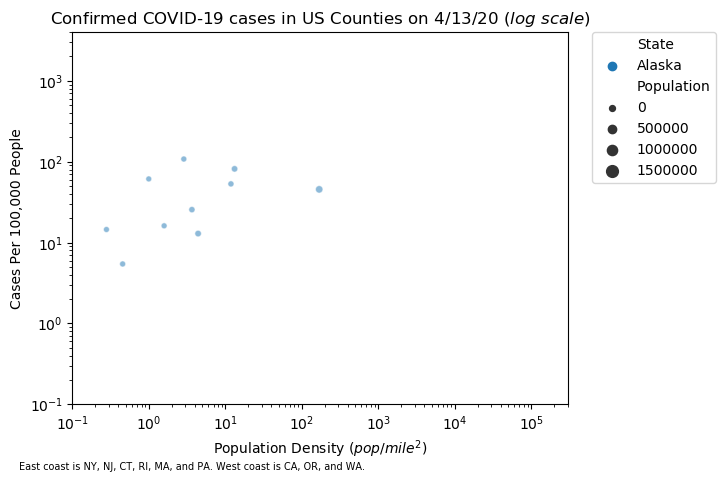

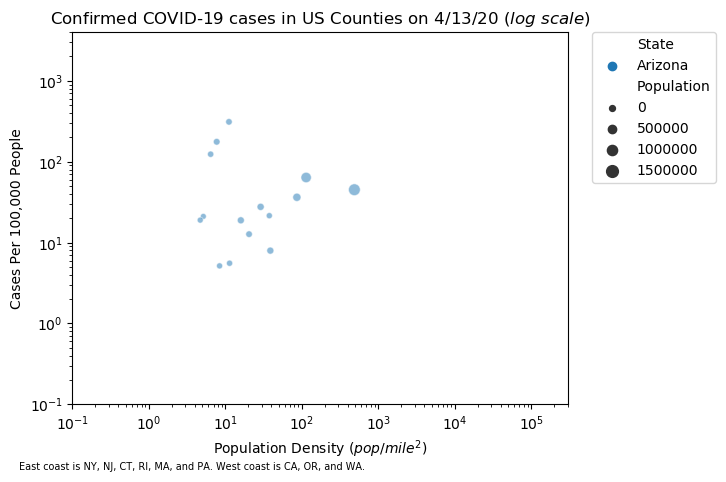

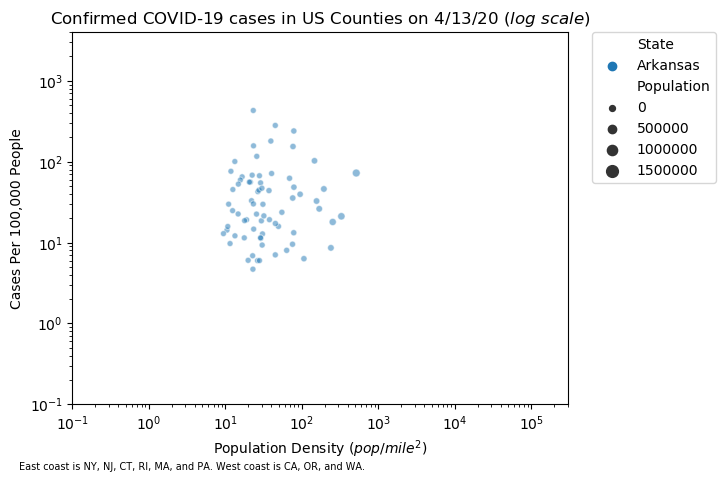

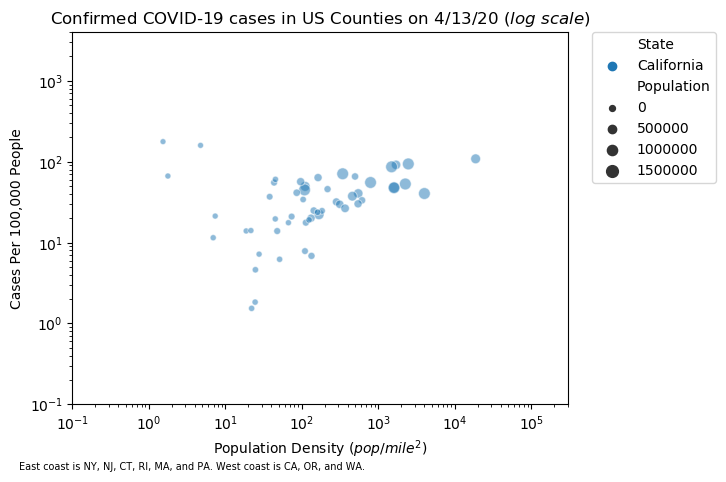

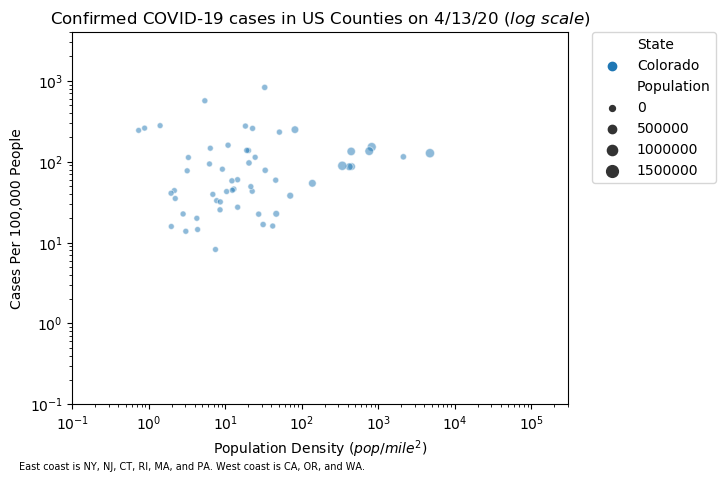

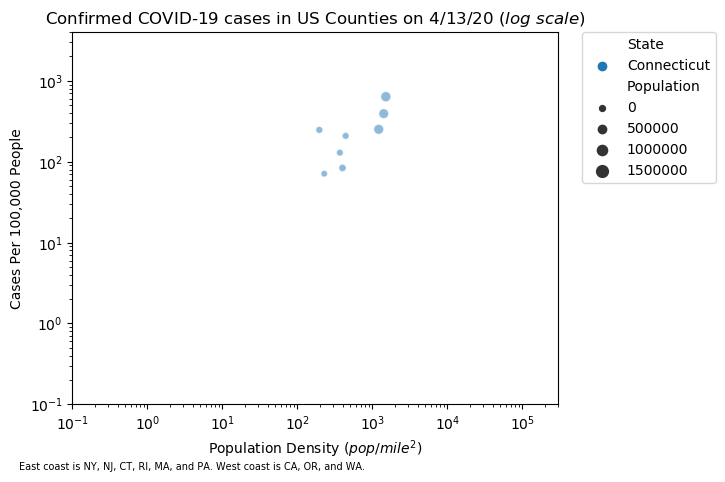

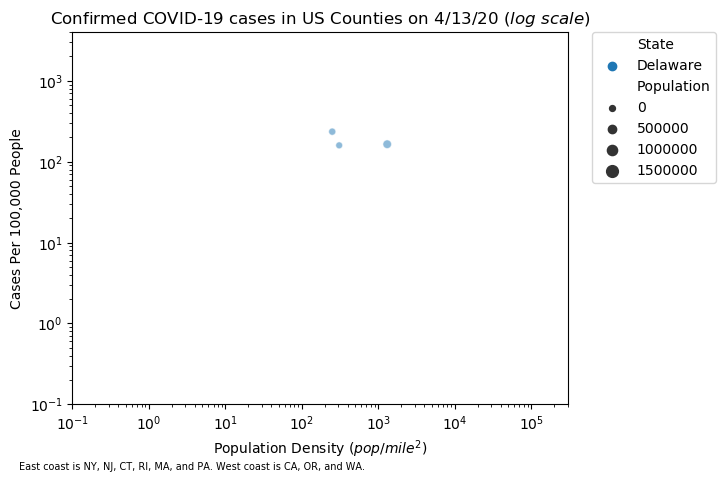

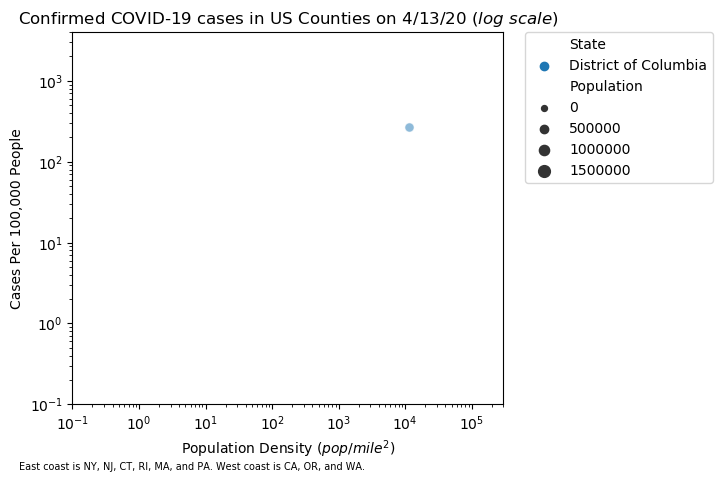

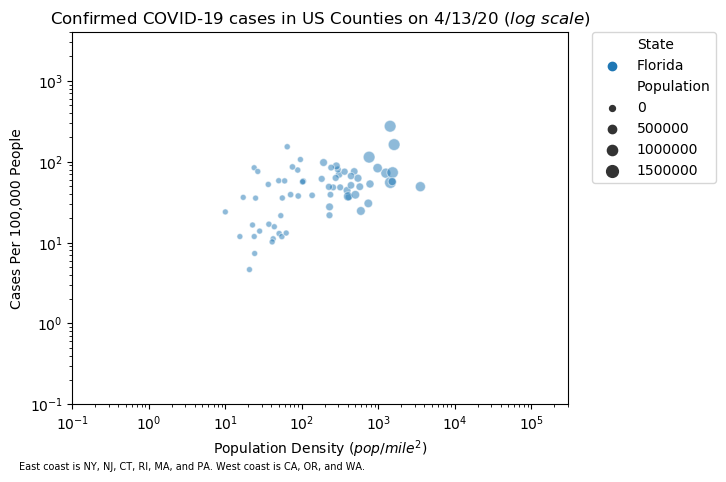

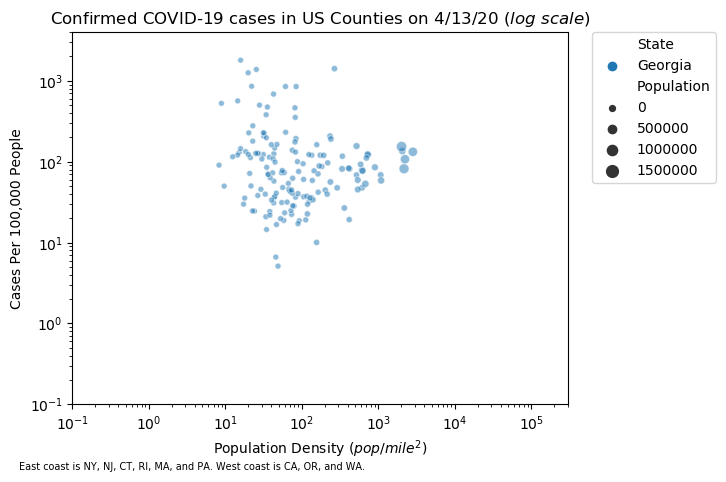

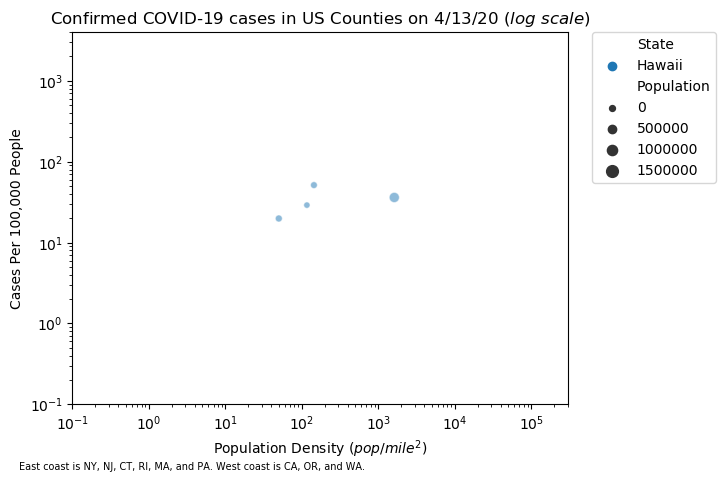

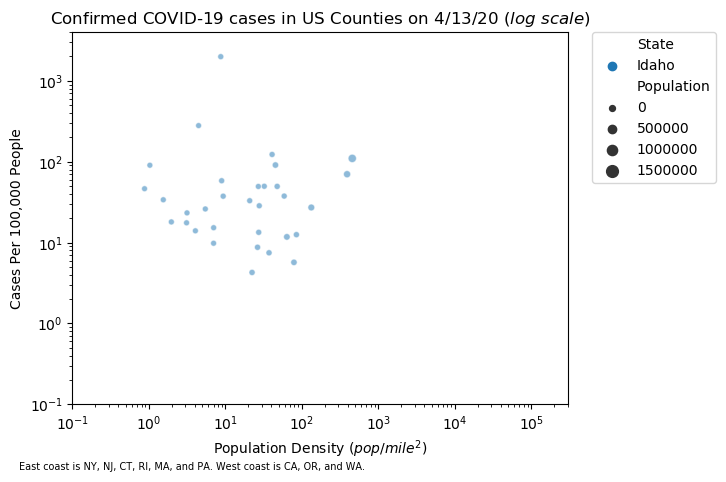

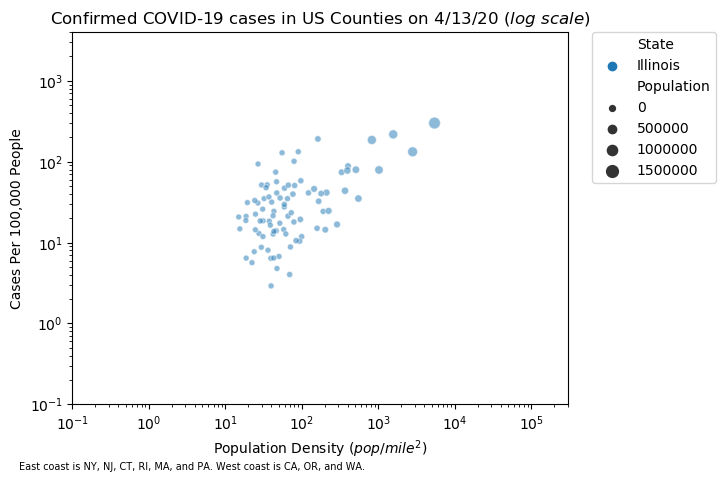

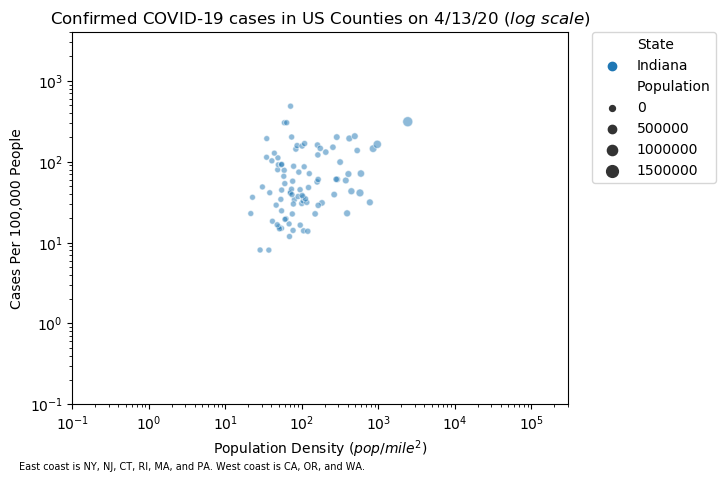

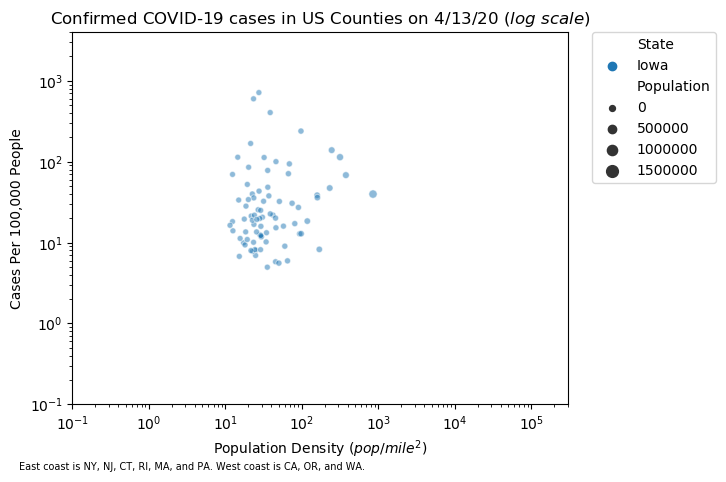

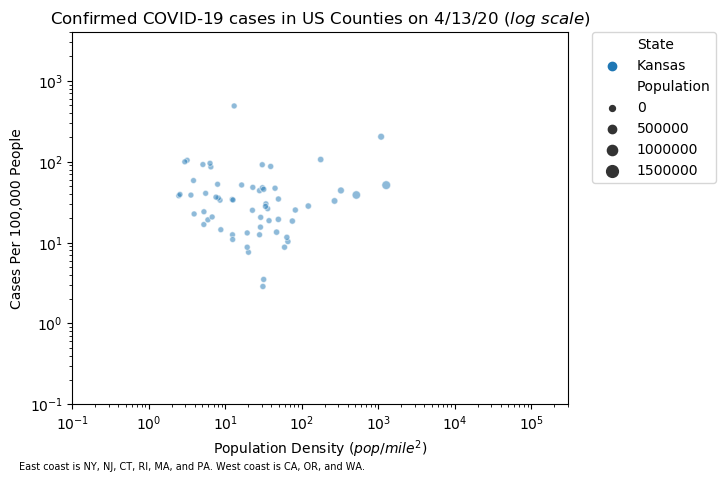

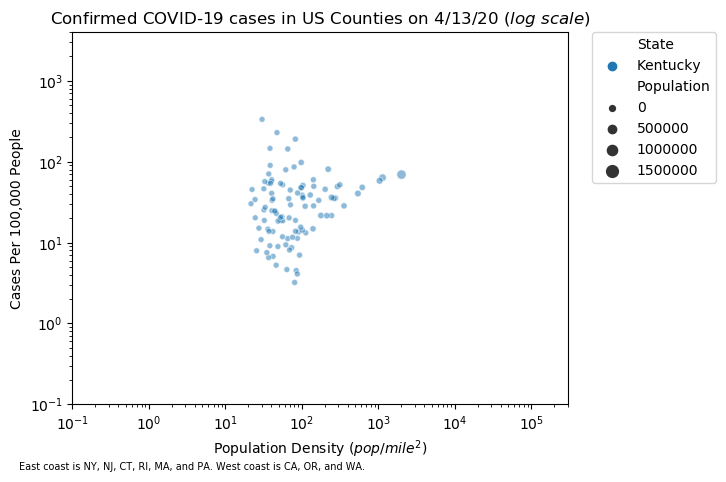

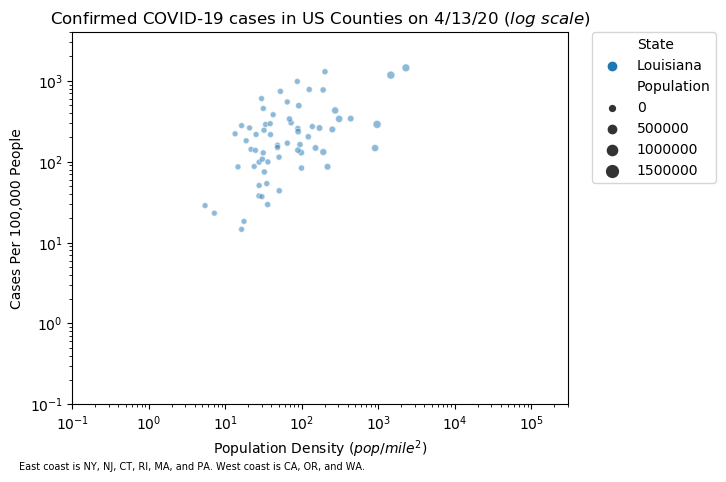

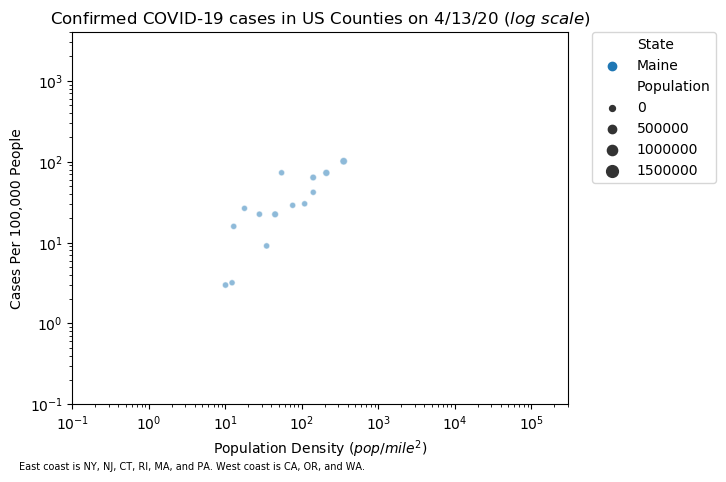

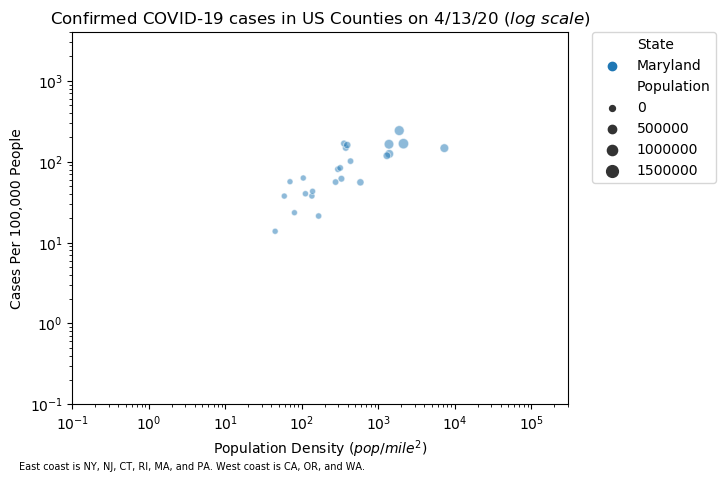

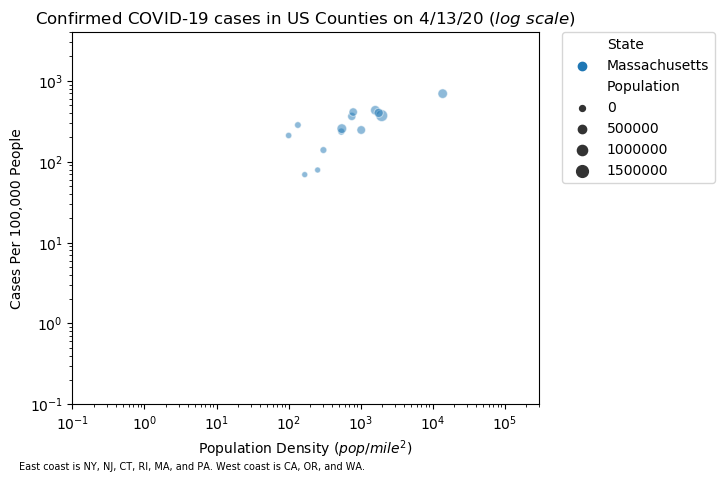

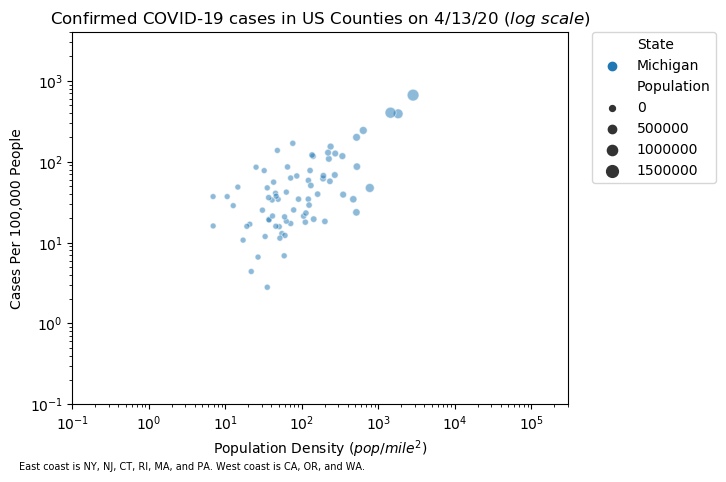

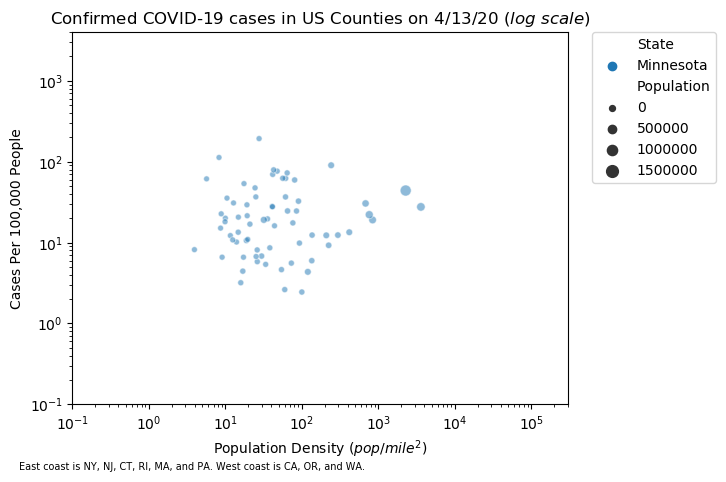

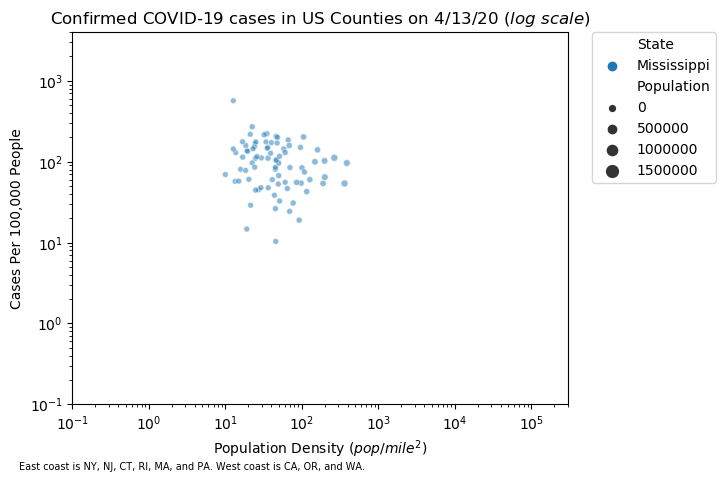

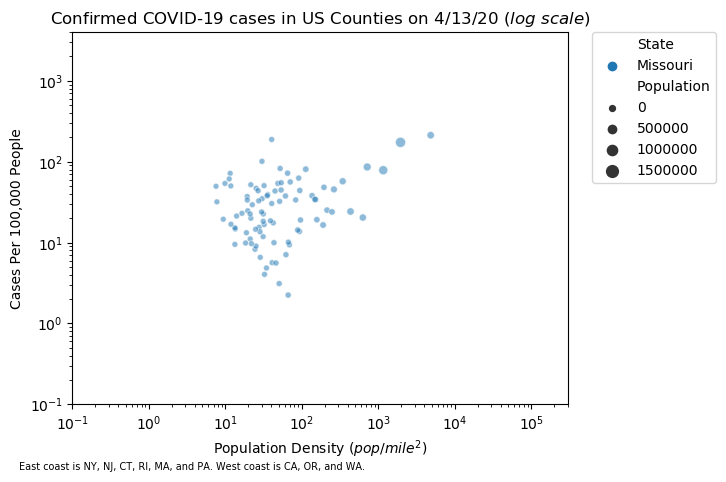

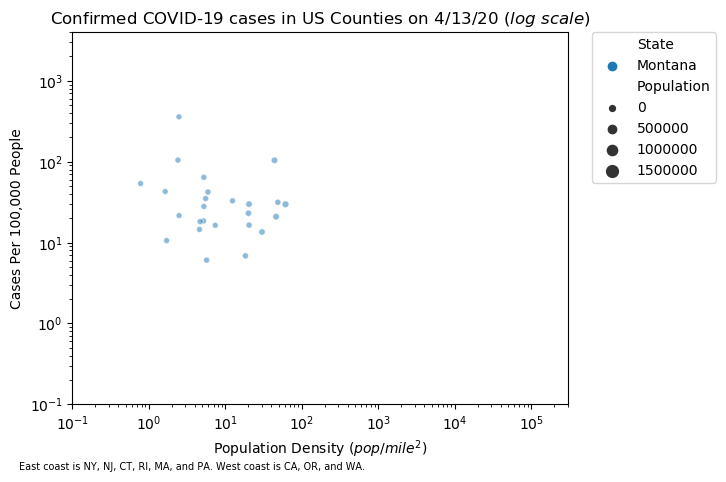

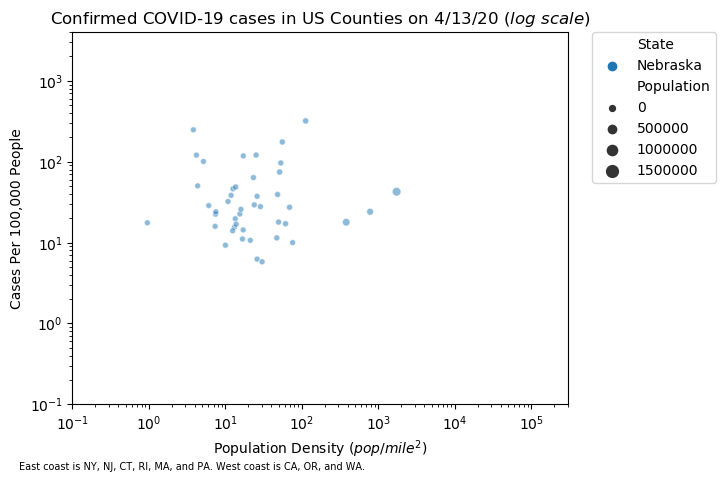

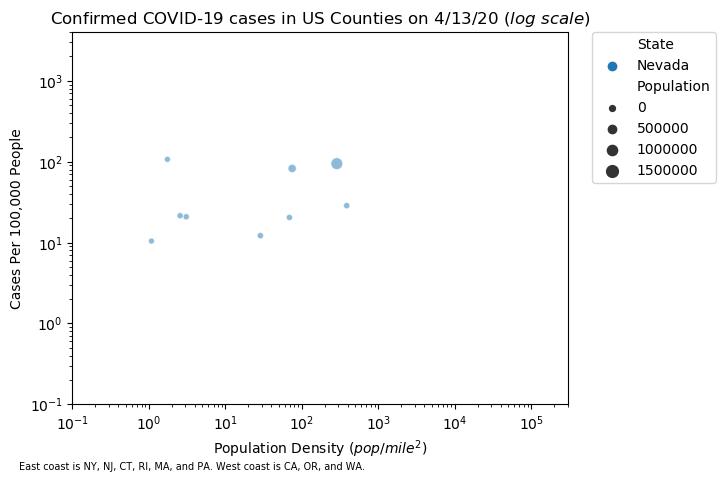

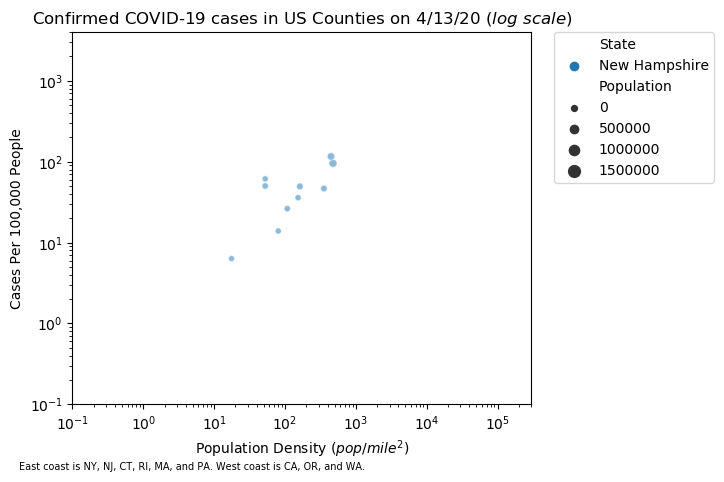

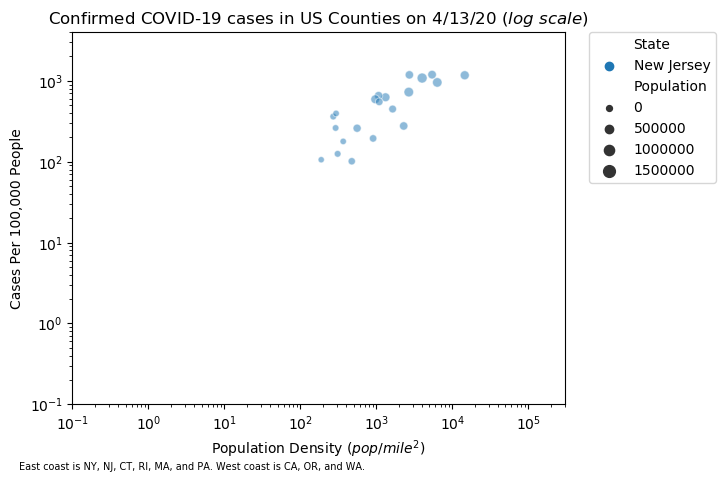

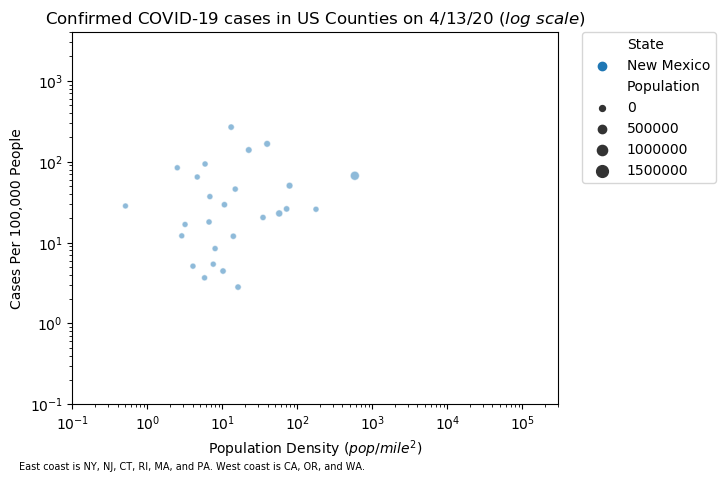

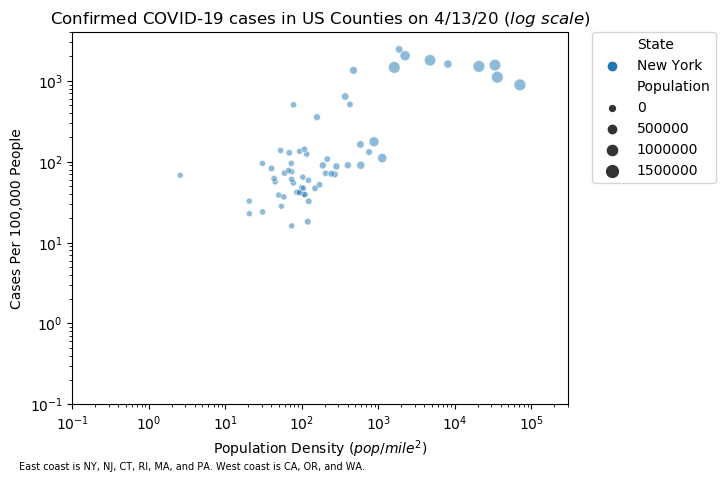

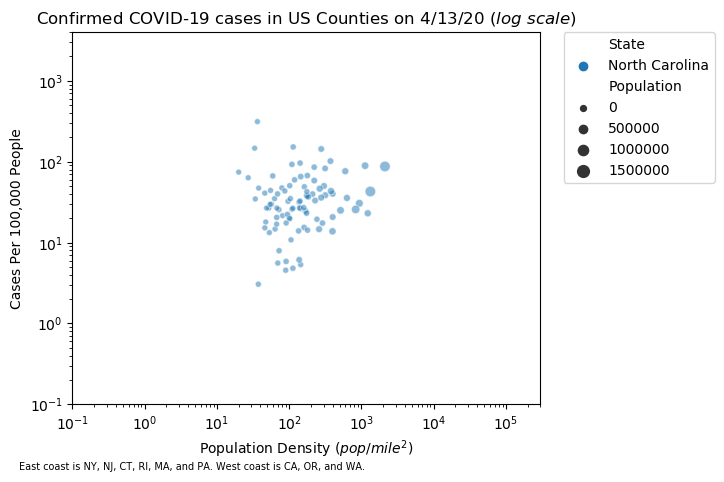

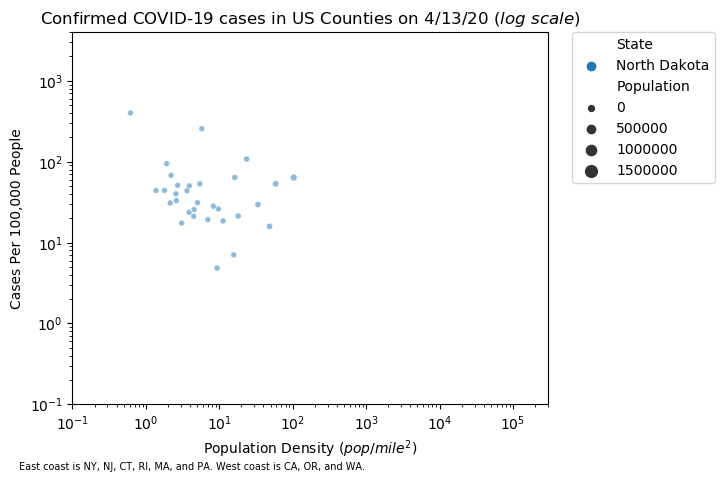

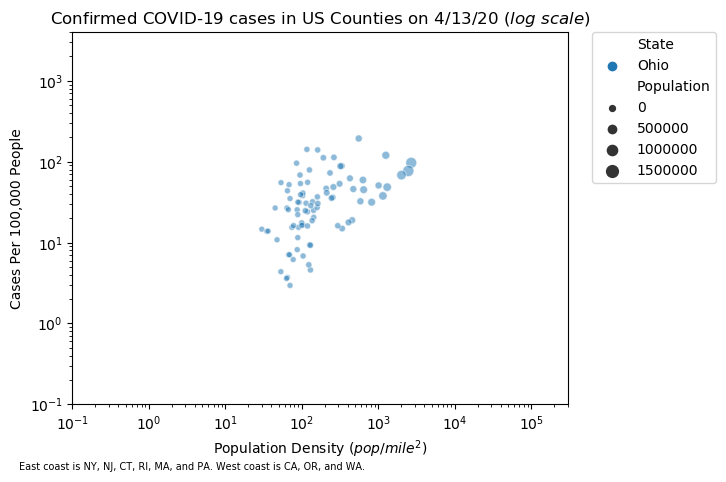

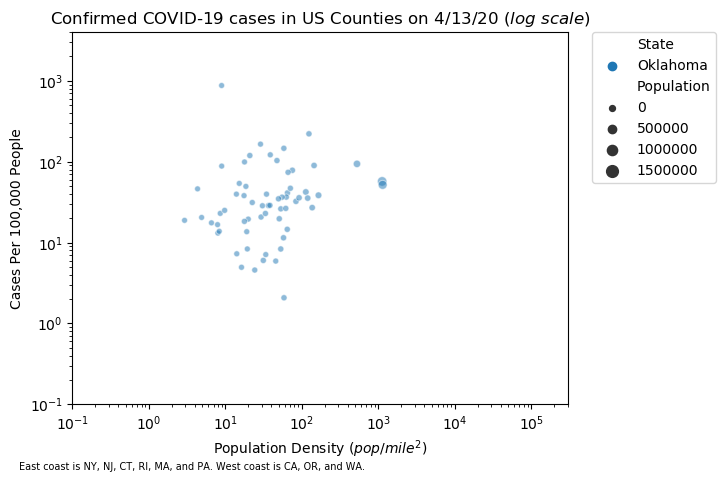

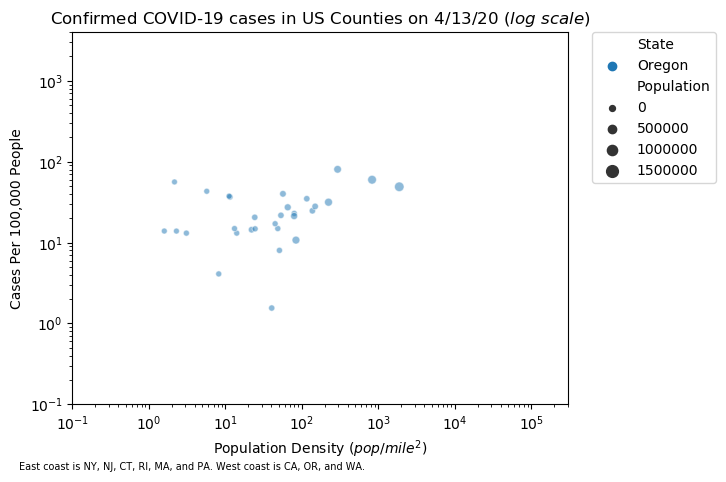

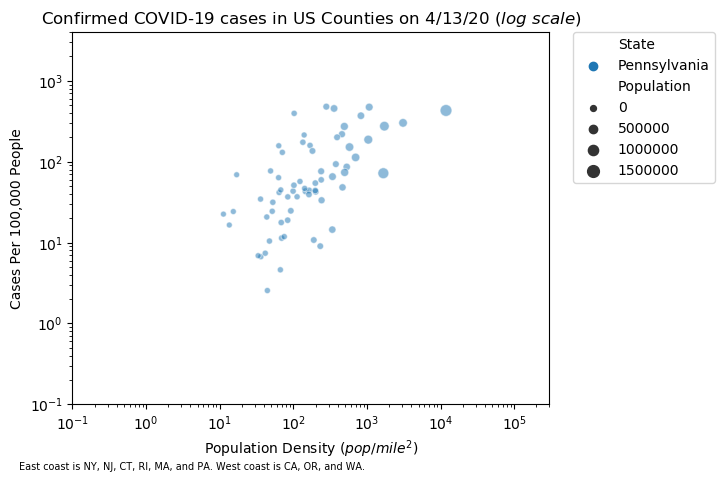

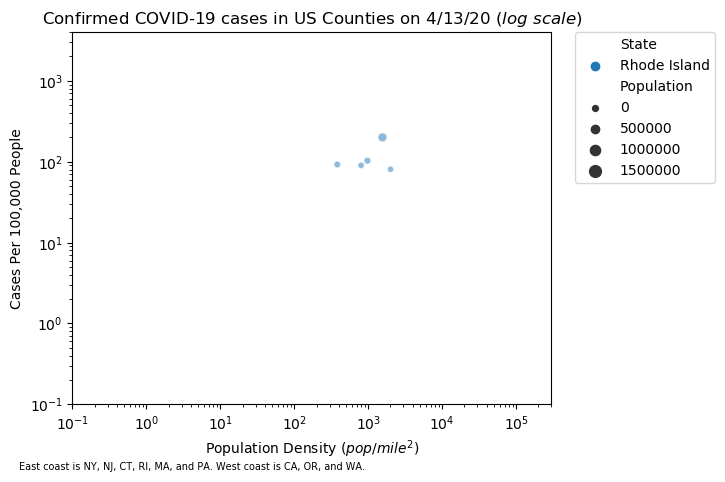

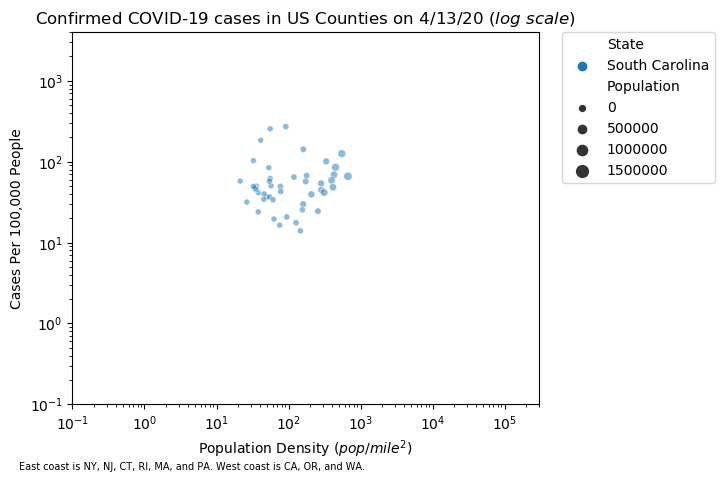

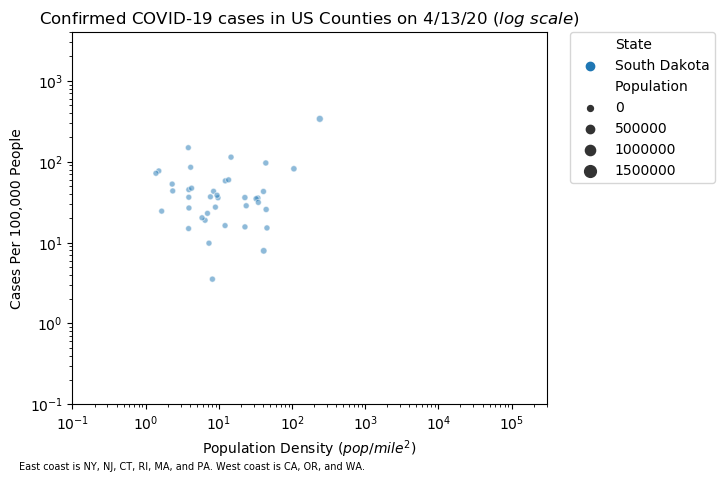

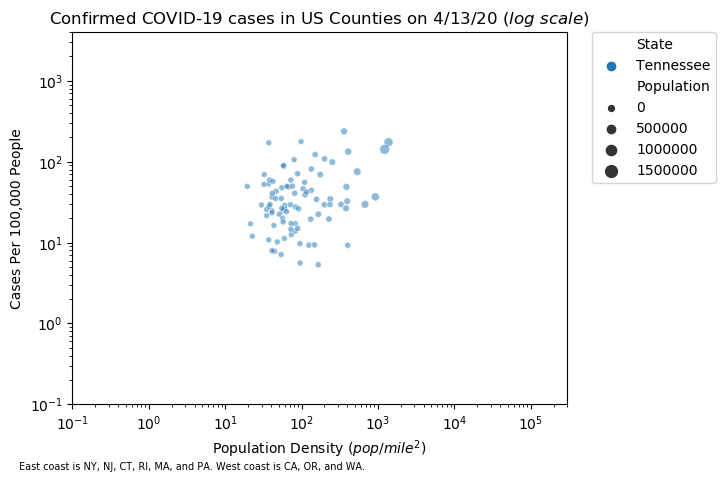

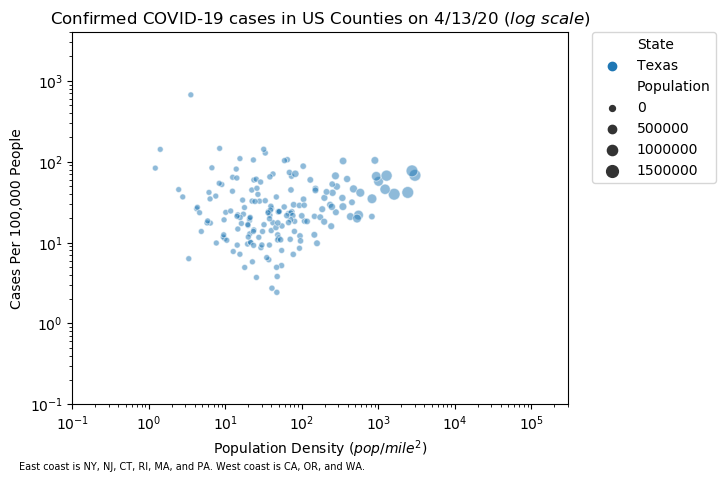

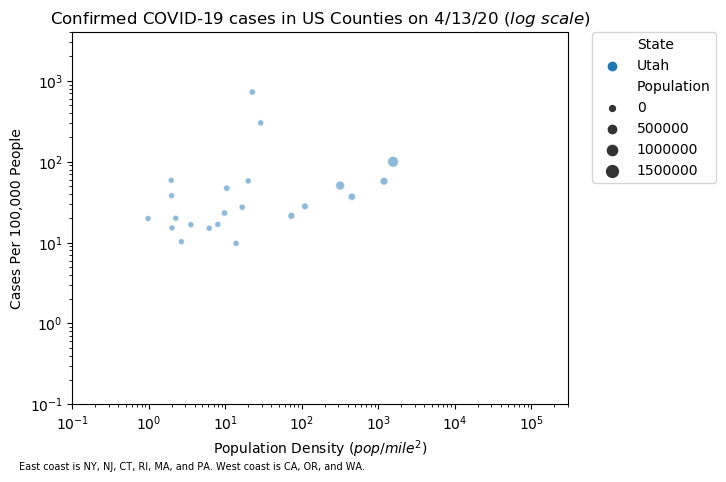

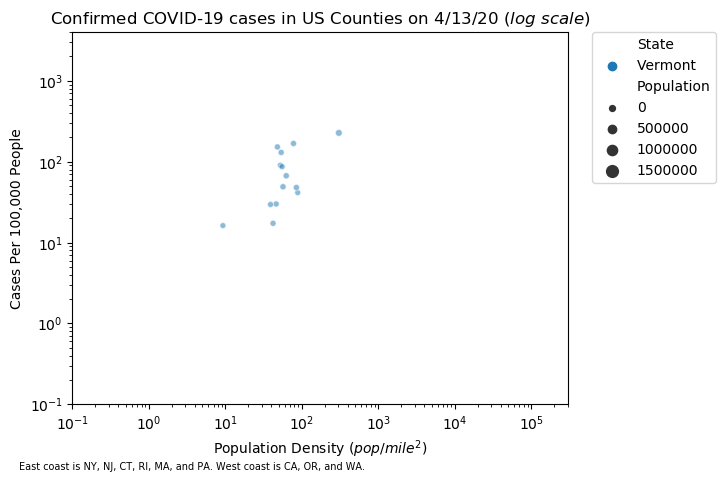

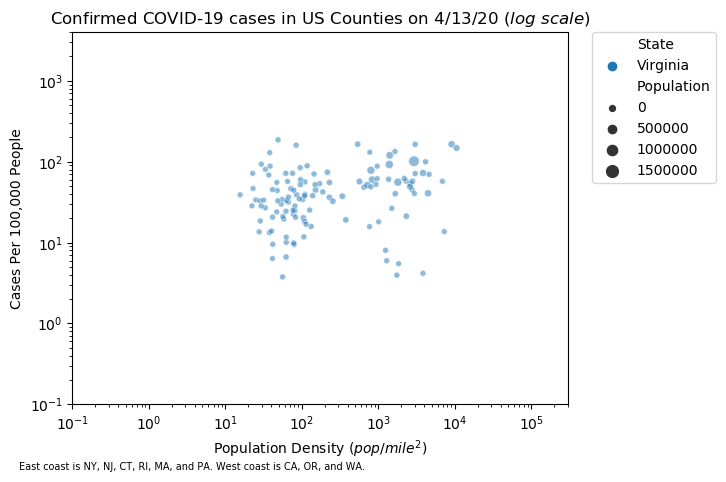

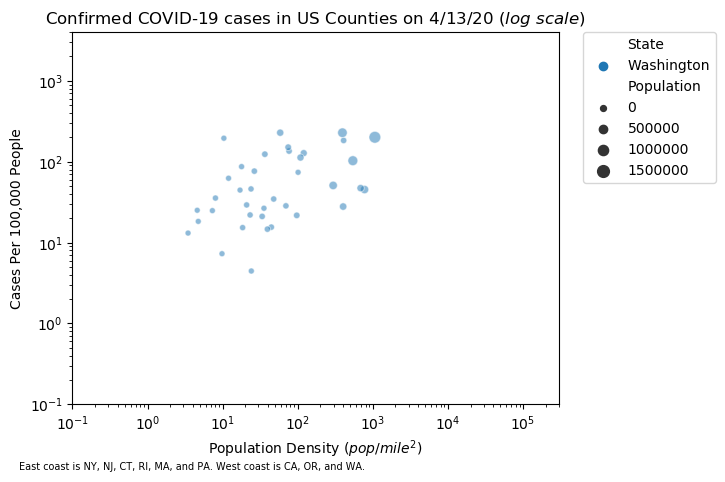

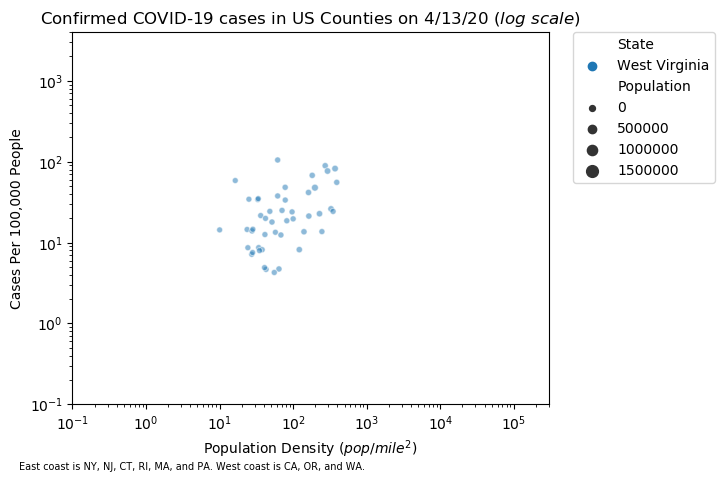

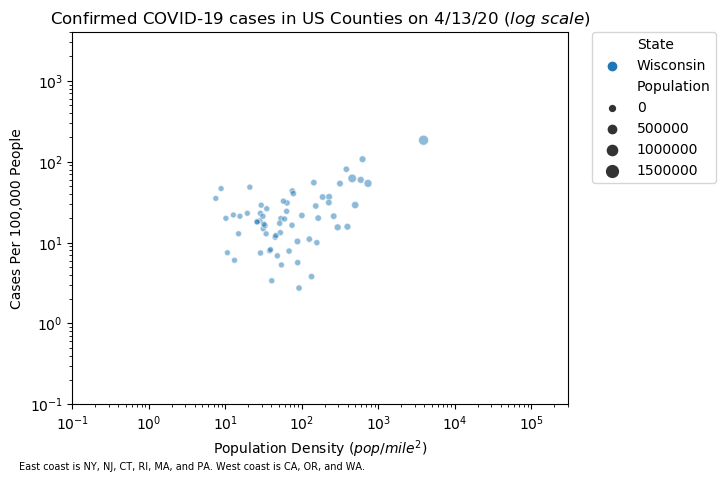

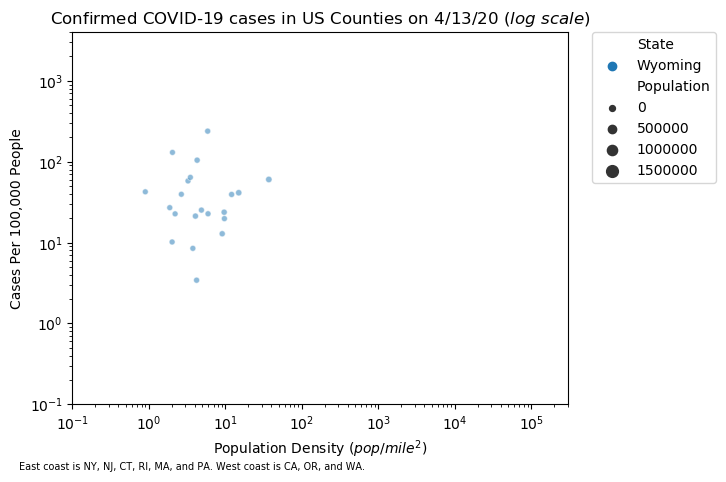

In [65]:
for i in range(len(state_list)):
    plt.figure(figsize=(7.4, 4.8))
    date = '4/13/20'
    casespc_col = date + '_casespc'
    sns.scatterplot(x='density', y=casespc_col, hue='State', 
#                     palette=sns.color_palette()[:2], 
                    size='Population',
                    size_norm=(0, 1_500_000),
                    data=df.loc[(df['State'] == state_list[i])], 
                                alpha=0.5)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xscale("log")
    plt.yscale("log")
    plt.ylabel('Cases Per 100,000 People')
    plt.xlabel('Population Density ($pop / mile^2$)')
    plt.ylim(0.1, 4000)
    plt.xlim(0.1, 300_000)
    plt.title('Confirmed COVID-19 cases in US Counties on {} ($log \,\, scale$)'.format(date))
    txt = '\n\nEast coast is NY, NJ, CT, RI, MA, and PA. West coast is CA, OR, and WA.'
    plt.figtext(0.5, 0.01, txt, wrap=False, horizontalalignment='right', fontsize=7)
    plt.tight_layout()
    plt.savefig('gif_state_size/casespc_{}.png'.format(state_list[i]), dpi=300)
    plt.show()

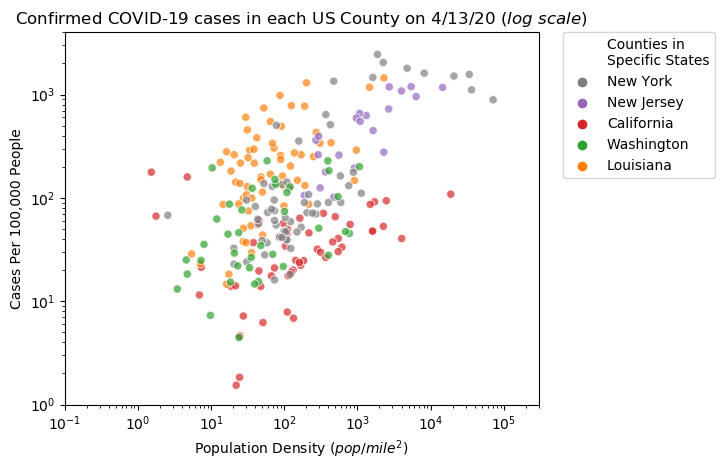

In [240]:
for i in range(87, 88):  # min is 5
    plt.figure(figsize=(7.4, 4.8))
    date = df.columns[i]
    casespc_col = df.columns[i] + '_casespc'
    df[casespc_col] = (df.iloc[:,i] / df.population) * 100_000
    
#     sns.scatterplot(x='density', y=casespc_col,
#                 color=sns.color_palette()[0], 
#                 data=df.loc[(df['Counties in\nSpecific States'] == 'Other States')], 
#                 alpha=0.17)
    sns.scatterplot(x='density', y=casespc_col, hue='Counties in\nSpecific States', 
                    palette=colors, # size='population',
                    # size_norm=(0, 400_000),
                    data=df.loc[(df['Counties in\nSpecific States'] == 'New York') | 
                                (df['Counties in\nSpecific States'] == 'New Jersey') | 
                                (df['Counties in\nSpecific States'] == 'California') |
                                (df['Counties in\nSpecific States'] == 'Washington') |
                               (df['Counties in\nSpecific States'] == 'Louisiana')] , 
                                hue_order=['New York', 'New Jersey', 'California', 
                                           'Washington', 'Louisiana'], 
                                alpha=0.7)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xscale("log")
    plt.yscale("log")
    plt.ylabel('Cases Per 100,000 People')
    plt.xlabel('Population Density ($pop / mile^2$)')
    plt.ylim(0.1, 4000)
    plt.xlim(0.1, 300_000)
    plt.title('Confirmed COVID-19 cases in each US County on {} ($log \,\, scale$)'.format(
            date))
    plt.tight_layout()
#     plt.savefig('gif/casespc_{}.png'.format(i), dpi=300)
    plt.show()

In [317]:
df.loc[221,'population']

62808

In [316]:
df.loc[221,'2/28/20']

2

In [312]:
2 / 62808

3.184307731499172e-05

In [320]:
df[['2/28/20', 'County Name']].sort_values(by='2/28/20', ascending=False)

2/28/20         County Name
220         2   Sacramento County
611         2         Cook County
221         2   San Benito County
223         2    San Diego County
229         2  Santa Clara County
...       ...                 ...
1055        0        Larue County
1056        0       Laurel County
1057        0     Lawrence County
1058        0          Lee County
3141        0       Weston County

[3142 rows x 2 columns]

In [319]:
df[['2/28/20_casespc', 'County Name']].sort_values(by='2/28/20_casespc', ascending=False)

2/28/20_casespc                 County Name
221          3.184308           San Benito County
198          0.737692             Humboldt County
220          0.128861           Sacramento County
1230         0.124392              Suffolk County
229          0.103742          Santa Clara County
...               ...                         ...
1059         0.000000               Leslie County
1060         0.000000              Letcher County
3141         0.000000               Weston County
92                NaN    Wade Hampton Census Area
186               NaN  Grand Princess Cruise Ship

[3142 rows x 2 columns]

In [140]:
# 

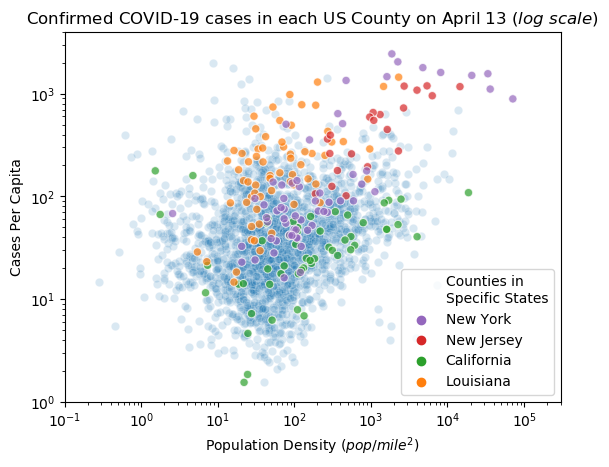

In [510]:
sns.scatterplot(x='density', y='casespc',
                color=sns.color_palette()[0], 
                data=df.loc[(df['Counties in\nSpecific States'] == 'Other States')], 
                alpha=0.17)
sns.scatterplot(x='density', y='casespc', hue='Counties in\nSpecific States', 
                palette=colors, 
                data=df.loc[(df['Counties in\nSpecific States'] == 'New York') | 
                            (df['Counties in\nSpecific States'] == 'New Jersey') | 
                            (df['Counties in\nSpecific States'] == 'California') |
                           (df['Counties in\nSpecific States'] == 'Louisiana')] , 
                            hue_order=['New York', 'New Jersey', 'California', 'Louisiana'], 
                            alpha=0.7)
plt.xscale("log")
plt.yscale("log")
plt.ylabel('Cases Per Capita')
plt.xlabel('Population Density ($pop / mile^2$)')
plt.ylim(1, 4000)
plt.xlim(0.1, 300_000)
plt.title('Confirmed COVID-19 cases in each US County on April 13 ($log \,\, scale$)')
# plt.savefig('casespc.png', dpi=300)
plt.show()

In [145]:
sns.regplot(df.density, df.casespc, scatter=True, scatter_kws={'alpha':0.2})
plt.xscale("log")
plt.yscale("log")
plt.ylabel('Cases Per 100,000 population')
plt.xlabel('Population Density ($pop / mile^2$)')
plt.ylim(1, 4000)

In [490]:
x = df.loc[(df.casespc > 0) & (df.casespc < np.float('inf'))].density
y = df.loc[(df.casespc > 0) & (df.casespc < np.float('inf'))].casespc

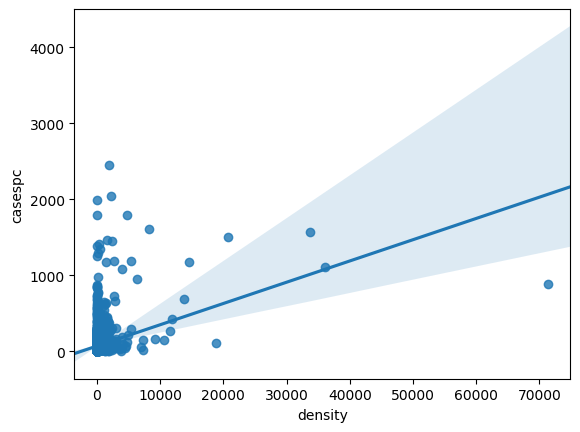

In [491]:
sns.regplot(x, y)

In [499]:
np.corrcoef(x, y)

array([[1.        , 0.33060755],
       [0.33060755, 1.        ]])

(0.1, 100000)

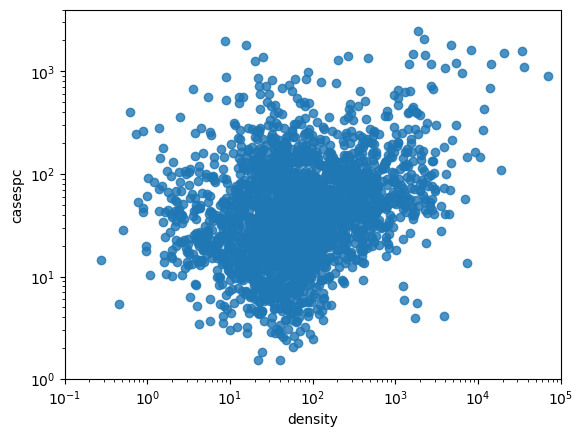

In [455]:
sns.regplot(x='density', y='casespc', data=df, fit_reg=True)
plt.xscale("log")
plt.yscale("log")
plt.ylim(1, 4000)
plt.xlim(0.1, 100_000)

In [458]:
np.polyfit(df.density, df.casespc, 1)

LinAlgError: SVD did not converge in Linear Least Squares

In [313]:
df.sort_values(by='casespc', ascending=False)

fips  cases                 County Name State  population       land  \
186    6000     21  Grand Princess Cruise Ship    CA           0  155779.22   
1872  36087   7965             Rockland County    NY      325789     173.55   
1888  36119  19786          Westchester County    NY      967506     430.50   
558   16013    458               Blaine County    ID       23021    2643.59   
507   13243    122             Randolph County    GA        6778     428.24   
...     ...    ...                         ...   ...         ...        ...   
835   19091      0             Humboldt County    IA        9558     434.35   
825   19071      0              Fremont County    IA        6960     511.15   
823   19067      0                Floyd County    IA       15642     500.63   
3141  56045      0               Weston County    WY        6927    2398.09   
92     2270      0    Wade Hampton Census Area    AK           0   17081.43   

         pop      density      casespc  spec  
186    239.1     0.000000          inf    CA  
1872  1795.9  1877.205416  2444.833926    NY  
1888  2204.7  2247.400697  2045.051917    NY  
558      8.1     8.708234  1989.487859  None  
507     18.0    15.827573  1799.940986  None  
...      ...          ...          ...   ...  
835     22.6    22.005295     0.000000  None  
825     14.6    13.616355     0.000000  None  
823     32.6    31.244632     0.000000  None  
3141     3.0     2.888549     0.000000  None  
92       0.4     0.000000          NaN  None  

[3142 rows x 10 columns]

In [379]:
df.sort_values(by='population')

fips  cases                 County Name  St  population       land  \
186    6000     21  Grand Princess Cruise Ship  CA           0  155779.22   
92     2270      0    Wade Hampton Census Area  AK           0   17081.43   
549   15005      0              Kalawao County  HI          86      11.99   
2673  48301      0               Loving County  TX         169     668.93   
2657  48269      0                 King County  TX         272     910.87   
...     ...    ...                         ...  ..         ...        ...   
223    6073   1847            San Diego County  CA     3338330    4206.63   
103    4013   2020             Maricopa County  AZ     4485414    9200.14   
2623  48201   3629               Harris County  TX     4713325    1703.48   
611   17031  15474                 Cook County  IL     5150233     945.33   
205    6037   9420          Los Angeles County  CA    10039107    4057.88   

         pop      density     casespc          spec        states  \
186    239.1     0.000000         inf            CA            CA   
92       0.4     0.000000         NaN  Other States  Other States   
549      7.5     7.172644    0.000000  Other States  Other States   
2673     0.1     0.252642    0.000000  Other States  Other States   
2657     0.3     0.298616    0.000000  Other States  Other States   
...      ...          ...         ...           ...           ...   
223    735.8   793.587741   55.327065            CA            CA   
103    414.9   487.537581   45.034862  Other States  Other States   
2623  2402.4  2766.880151   76.994478  Other States  Other States   
611   5495.1  5448.079507  300.452426  Other States  Other States   
205   2419.6  2473.978284   93.833047            CA            CA   

            States  
186             CA  
92    Other States  
549   Other States  
2673  Other States  
2657  Other States  
...            ...  
223             CA  
103   Other States  
2623  Other States  
611   Other States  
205             CA  

[3142 rows x 12 columns]

In [127]:
import plotly.figure_factory as ff

import numpy as np
import pandas as pd

df_sample = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/laucnty16.csv')
df_sample['State FIPS Code'] = df_sample['State FIPS Code'].apply(lambda x: str(x).zfill(2))
df_sample['County FIPS Code'] = df_sample['County FIPS Code'].apply(lambda x: str(x).zfill(3))
df_sample['FIPS'] = df_sample['State FIPS Code'] + df_sample['County FIPS Code']

colorscale = ["#f7fbff","#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",
              "#85bcdb","#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",
              "#08519c","#0b4083","#08306b"]
endpts = list(np.linspace(1, 12, len(colorscale) - 1))
fips = df_sample['FIPS'].tolist()
values = df_sample['Unemployment Rate (%)'].tolist()

fig = ff.create_choropleth(
    fips=fips, values=values,
#     binning_endpoints=endpts,
#     colorscale=colorscale,
#     show_state_data=False,
#     show_hover=True, centroid_marker={'opacity': 0},
#     asp=2.9, title='USA by Unemployment %',
#     legend_title='% unemployed'
)

fig.layout.template = None
fig.show()

In [103]:
df_sample['FIPS']

0       01001
1       01003
2       01005
3       01007
4       01009
        ...  
3214    72145
3215    72147
3216    72149
3217    72151
3218    72153
Name: FIPS, Length: 3219, dtype: object

In [105]:
dfl = dfl.sort_values(by='fips')

In [131]:
dfl.land

0       3531905.43
1         50645.33
2           594.44
3          1589.78
4           884.88
           ...    
3190      10426.65
3191       3995.38
3192       2081.26
3193       2238.55
3194       2398.09
Name: land, Length: 3195, dtype: float64

In [268]:
colorscale = ["#f7fbff","#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",
              "#85bcdb","#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",
              "#08519c","#0b4083","#08306b"]
endpts = list(np.linspace(1, 12, len(colorscale) - 1))
fips = dfl.fips.tolist()
values = dfl.land.tolist()

fig = ff.create_choropleth(
    fips=fips, values=values,
    binning_endpoints=endpts,
    colorscale=colorscale,
    show_state_data=False,
    show_hover=True, centroid_marker={'opacity': 0},
    asp=2.9, title='USA by Unemployment %',
    legend_title='% unemployed'
)

fig.layout.template = None
fig.show()

NameError: name 'np' is not defined

In [111]:
df_sample['FIPS']

0       01001
1       01003
2       01005
3       01007
4       01009
        ...  
3214    72145
3215    72147
3216    72149
3217    72151
3218    72153
Name: FIPS, Length: 3219, dtype: object

In [115]:
dfl.fips = dfl.fips.astype('object')

In [122]:
dfl.fips

0           0
1        1000
2        1001
3        1003
4        1005
        ...  
3190    56037
3191    56039
3192    56041
3193    56043
3194    56045
Name: fips, Length: 3195, dtype: object

In [124]:
dfl.fips = dfl.fips.apply(lambda x: str(x).zfill(5))

In [129]:
dfl.values

array([['00000', 3531905.43, 87.4],
       ['01000', 50645.33, 94.4],
       ['01001', 594.44, 91.8],
       ...,
       ['56041', 2081.26, 10.1],
       ['56043', 2238.55, 3.8],
       ['56045', 2398.09, 3.0]], dtype=object)